<a href="https://colab.research.google.com/github/AlonaMATI/Python-Projects/blob/main/Analytic_for_product_company_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Connecting Google Drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Pandas_task

/content/drive/MyDrive/Pandas_task


In [ ]:
country_data = pd.read_csv("countries.csv")
country_data.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


**Аналіз та очищення даних у таблиці Countries**

In [ ]:
print(country_data.shape)

(249, 5)


In [ ]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [ ]:
print(country_data.isna().sum())

name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64


In [ ]:
duplicate_rows = country_data.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())


0      False
1      False
2      False
3      False
4      False
       ...  
244    False
245    False
246    False
247    False
248    False
Length: 249, dtype: bool
0


In [ ]:
country_data = country_data.fillna("Unknown")

In [ ]:
country_data = country_data.rename(columns={"alpha-3": "Country Code"})

In [ ]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          249 non-null    object
 1   alpha-2       249 non-null    object
 2   Country Code  249 non-null    object
 3   region        249 non-null    object
 4   sub-region    249 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


**Аналіз та очищення даних у таблиці Events**

In [ ]:
event_data = pd.read_csv("events.csv")
event_data.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [ ]:
print(event_data.shape)

(1330, 10)


In [ ]:
event_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


In [ ]:
print(event_data.isna().sum())

Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64


In [ ]:
print(event_data.isna().sum() / event_data.shape[0] * 100)

Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64


In [ ]:
event_data.describe()

,Order ID,Product ID,Units Sold,Unit Price,Unit Cost
count,1.330000e+03,1330.000000,1328.000000,1330.000000,1330.000000
mean,5.412048e+08,5788.096241,4952.201807,264.893541,187.246812
std,2.573882e+08,2820.728878,2905.198996,217.323460,176.158873
min,1.006406e+08,1270.000000,2.000000,9.330000,6.920000
25%,3.190004e+08,3127.000000,2356.750000,81.730000,35.840000
50%,5.387164e+08,5988.000000,4962.000000,154.060000,97.440000
75%,7.544628e+08,8681.000000,7459.500000,437.200000,263.330000
max,9.998797e+08,8969.000000,9999.000000,668.270000,524.960000


In [ ]:
duplicate_rows = event_data.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())

0       False
1       False
2       False
3       False
4       False
        ...  
1325    False
1326    False
1327    False
1328    False
1329    False
Length: 1330, dtype: bool
0


In [ ]:
event_data["Country Code"] = event_data["Country Code"].fillna("Unknown")

In [ ]:
event_data["Units Sold"] = event_data.groupby("Product ID")["Units Sold"].transform(lambda x: x.fillna(x.mean()))


In [ ]:
event_data["Order Date"] = pd.to_datetime(event_data["Order Date"])

In [ ]:
event_data["Ship Date"] = pd.to_datetime(event_data["Ship Date"])

In [ ]:
event_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1330 non-null   int64         
 1   Order Date      1330 non-null   datetime64[ns]
 2   Ship Date       1330 non-null   datetime64[ns]
 3   Order Priority  1330 non-null   object        
 4   Country Code    1330 non-null   object        
 5   Product ID      1330 non-null   int64         
 6   Sales Channel   1330 non-null   object        
 7   Units Sold      1330 non-null   float64       
 8   Unit Price      1330 non-null   float64       
 9   Unit Cost       1330 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 104.0+ KB


**Аналіз та очищення даних у таблиці Products**

In [ ]:
product_data = pd.read_csv("products.csv")
product_data.head(20)

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies
5,4594,Fruits
6,5988,Vegetables
7,7331,Baby Food
8,8875,Meat
9,8293,Cosmetics


In [ ]:
print(product_data.shape)

(12, 2)


In [ ]:
product_data = product_data.rename(columns={"id": "Product ID"})

In [ ]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Product ID  12 non-null     int64 
 1   item_type   12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


*   Перша таблиця Countries містить інформацію про всі країни, а саме їх абревіатури та регіони і суб-регіони, до яких кожна країна належить.
*   Друга таблиця events містить інформацію про замовленнях, які були зроблені, а саме ID замовлення (Order ID), дата замовлення та дана його відправки (Order Date&Ship Date), який ступінь пріоритету замовлення (Order Priority), код країни з якої було зроблено замовлення (Country Code), ID товару який замовлено (Product ID), канал продажу через який дане замовлення було зроблено (Sales Channel), кількість проданих товарів (Units Sold), ціна товару (Unit Price), собівартість товару (Unit Cost).
*   Третя таблиця містить інформацію про категорії товарів, які є в даному магазині.

Ключовим полем, що поєднує першу і другу таблицю є Country Code (alpha-3). Ключовим полем, що поєднує другу і третю таблицю є Product ID (id).


**Об’єднання трьох таблиць в один датафрейм.**

In [ ]:
data_join = pd.merge(event_data, product_data, on="Product ID", how="left")
print(data_join)


       Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
0     100640618 2014-10-08 2014-10-18              M          NOR        2103   
1     100983083 2016-08-11 2016-08-11              C          SRB        2103   
2     101025998 2014-07-18 2014-08-11              M      Unknown        7940   
3     102230632 2017-05-13 2017-06-13              L          MNE        2455   
4     103435266 2012-08-11 2012-09-18              H          SRB        1270   
...         ...        ...        ...            ...          ...         ...   
1325  994504153 2017-01-10 2017-01-13              M          SWE        4594   
1326  994978797 2014-12-05 2015-01-02              H          ITA        1270   
1327  996754205 2010-09-20 2010-09-22              L          RUS        7331   
1328  998043382 2010-06-15 2010-07-03              H          MLT        8293   
1329  999879729 2012-03-31 2012-05-06              M          ALB        7940   

     Sales Channel  Units S

In [ ]:
data_all = pd.merge(data_join, country_data, on="Country Code", how="left")
print(data_all)

       Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
0     100640618 2014-10-08 2014-10-18              M          NOR        2103   
1     100983083 2016-08-11 2016-08-11              C          SRB        2103   
2     101025998 2014-07-18 2014-08-11              M      Unknown        7940   
3     102230632 2017-05-13 2017-06-13              L          MNE        2455   
4     103435266 2012-08-11 2012-09-18              H          SRB        1270   
...         ...        ...        ...            ...          ...         ...   
1325  994504153 2017-01-10 2017-01-13              M          SWE        4594   
1326  994978797 2014-12-05 2015-01-02              H          ITA        1270   
1327  996754205 2010-09-20 2010-09-22              L          RUS        7331   
1328  998043382 2010-06-15 2010-07-03              H          MLT        8293   
1329  999879729 2012-03-31 2012-05-06              M          ALB        7940   

     Sales Channel  Units S

In [ ]:
data_all = data_all.drop("alpha-2", axis=1)

In [ ]:
data_all = data_all.drop("sub-region", axis=1)

In [ ]:
data_all = data_all.rename(columns={"item_type": "Category"})

In [ ]:
data_all = data_all.rename(columns={"name": "Country"})

In [ ]:
data_all.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,Category,Country,region
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Cereal,Norway,Europe
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Cereal,Serbia,Europe
2,101025998,2014-07-18,2014-08-11,M,Unknown,7940,Online,4693.0,668.27,502.54,Household,NaN,NaN
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Clothes,Montenegro,Europe
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Beverages,Serbia,Europe


# **Data analysis and visualization**

In [ ]:
total_num_of_orders = data_all["Order ID"].count()
print(f"Total number of orders: {total_num_of_orders}")

Total number of orders: 1330


In [ ]:
total_revenue = (data_all["Units Sold"] * data_all["Unit Price"]).sum()
print(f"Total revenue: ${total_revenue:.2f}")

Total revenue: $1704563424.37


In [ ]:
total_costs = (data_all["Units Sold"] * data_all["Unit Cost"]).sum()
total_profit = total_revenue - total_costs
print(f"Total profit: ${total_profit:.2f}")

Total profit: $501832847.92


In [ ]:
total_num_of_countries = data_all["Country Code"].nunique()
print(f"Total number of countries: {total_num_of_countries}")

Total number of countries: 46


In [ ]:
units_sold_by_categories = (data_all.groupby("Category")["Units Sold"].sum().sort_values(ascending=False))


<ipython-input-40-cf9e2ddb4eb9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=units_sold_by_categories.values, y=units_sold_by_categories.index, palette="Blues_d")


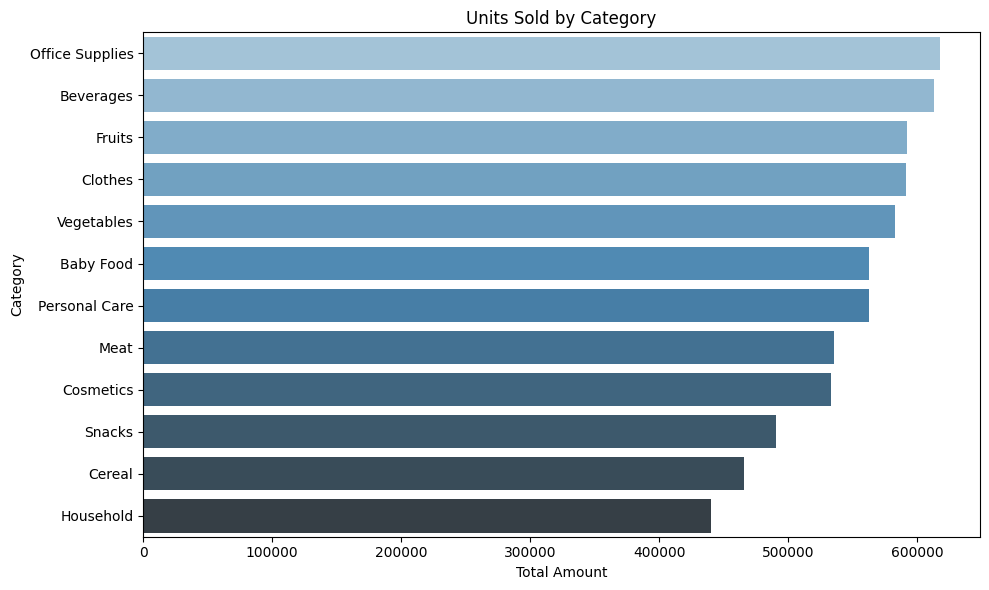

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=units_sold_by_categories.values, y=units_sold_by_categories.index, palette="Blues_d")
plt.title("Units Sold by Category")
plt.xlabel("Total Amount")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


За кількістю проданих одиниць товару бачимо, що лідируючими категоріями є: Office Supplies, Beverages та Fruits.


# **Аналіз доходів за категоріями, регіонами, країнами та каналами продажу.**


In [ ]:
data_all["Revenue"] = data_all["Units Sold"] * data_all["Unit Price"]

sales_by_categories = (data_all.groupby("Category")["Revenue"].sum().sort_values(ascending=False))
print(sales_by_categories)

Category
Office Supplies    4.022140e+08
Household          2.942052e+08
Cosmetics          2.331548e+08
Meat               2.257962e+08
Baby Food          1.436476e+08
Cereal             9.579140e+07
Vegetables         8.974673e+07
Snacks             7.478861e+07
Clothes            6.462655e+07
Personal Care      4.597884e+07
Beverages          2.909316e+07
Fruits             5.520300e+06
Name: Revenue, dtype: float64


<ipython-input-42-e4e7dc12913d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_categories.values, y=sales_by_categories.index, palette="Blues_d")


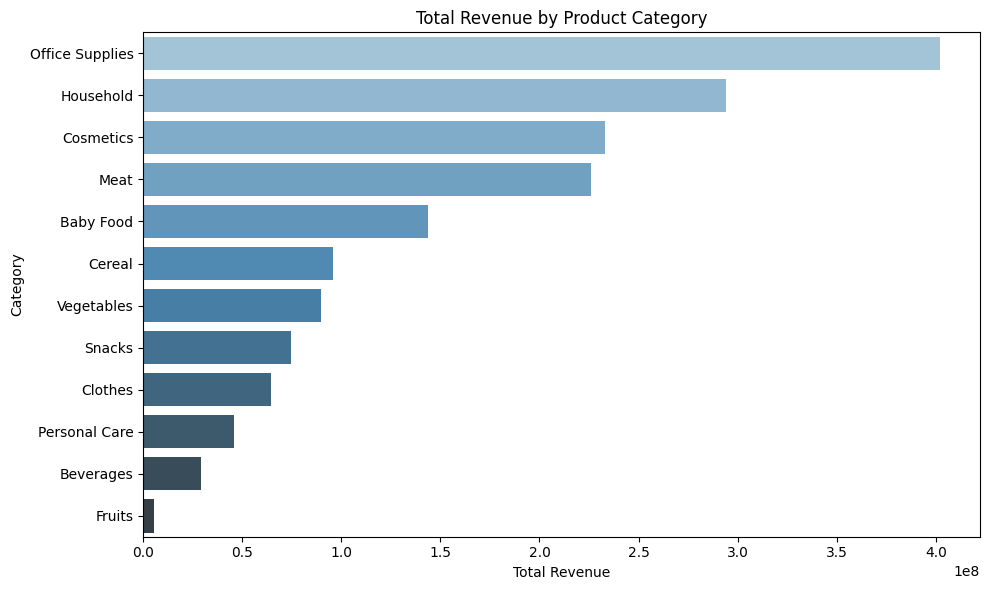

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_categories.values, y=sales_by_categories.index, palette="Blues_d")
plt.title("Total Revenue by Product Category")
plt.xlabel("Total Revenue")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

За кількістю отриманого доходу бачимо, що лідируючими категоріями є: Office Supplies, Household та Cosmetics.

In [ ]:
sales_by_countries = (data_all.groupby("Country")["Revenue"].sum().sort_values(ascending=False))
print(sales_by_countries)

Country
Czech Republic            5.354393e+07
Ukraine                   5.325232e+07
Bosnia and Herzegovina    5.011751e+07
Macedonia                 4.922209e+07
San Marino                4.788371e+07
Andorra                   4.775669e+07
Portugal                  4.717219e+07
Malta                     4.714532e+07
Russia                    4.605166e+07
Slovakia                  4.294100e+07
Hungary                   4.240825e+07
Serbia                    4.219354e+07
France                    3.936211e+07
Slovenia                  3.889253e+07
Latvia                    3.872208e+07
Greece                    3.869954e+07
Bulgaria                  3.816156e+07
Germany                   3.805509e+07
Armenia                   3.751984e+07
Italy                     3.587835e+07
Austria                   3.574087e+07
Sweden                    3.548213e+07
Romania                   3.428615e+07
Belarus                   3.423626e+07
Poland                    3.380540e+07
Luxembourg       

In [ ]:
sales_by_region = (data_all.groupby("region")["Revenue"].sum().sort_values(ascending=False))


<ipython-input-45-08857d1639ea>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_region.values, y=sales_by_region.index, palette="Blues_d")


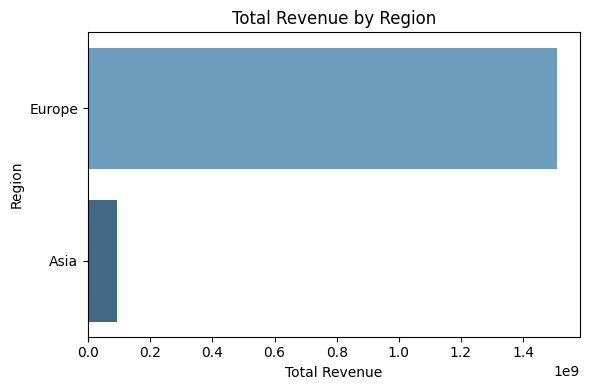

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=sales_by_region.values, y=sales_by_region.index, palette="Blues_d")
plt.title("Total Revenue by Region")
plt.xlabel("Total Revenue")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

In [ ]:
sales_by_region = data_all.groupby("region")["Revenue"].sum()
total_revenue = sales_by_region.sum()

sales_by_region_percent = (sales_by_region / total_revenue) * 100
print(sales_by_region_percent)

region
Asia       5.828016
Europe    94.171984
Name: Revenue, dtype: float64


Аналізуючи отриманий дохід у розрізі регіонів, бачимо, що продажі здійснюються тільки в Європі та Азії. Але переважно це Європа 94%.


<ipython-input-47-1afc43acdd7c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette="viridis")


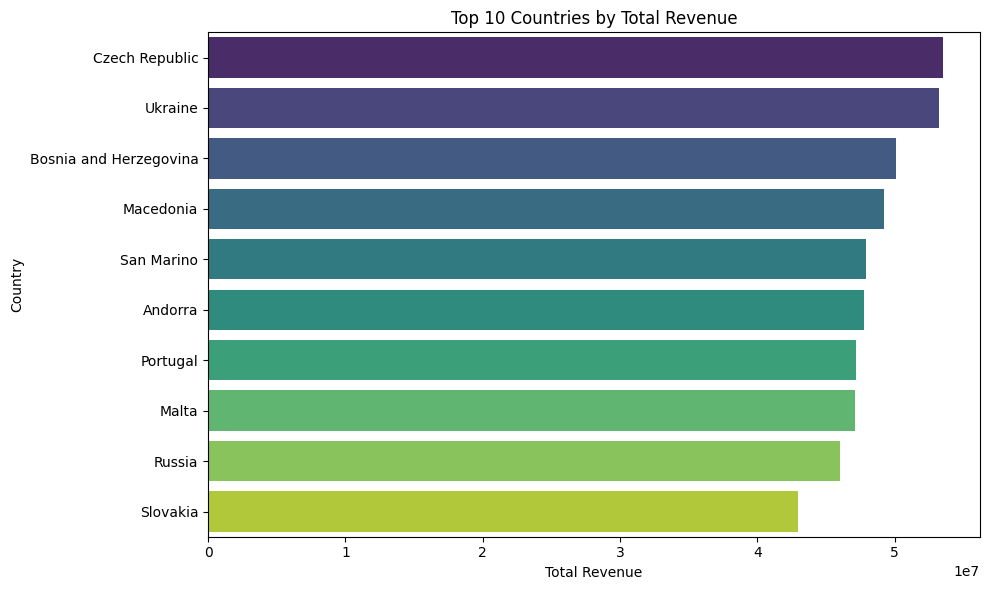

In [ ]:
top_10_countries = sales_by_countries.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette="viridis")

plt.title("Top 10 Countries by Total Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

Топ 3 країни за рівнем продажу: Чехія, Україна та Боснія та Герцеговина.

In [ ]:
data_all["Sales Channel"] = data_all["Sales Channel"].str.capitalize()
sales_by_sales_channel = (data_all.groupby("Sales Channel")["Revenue"].sum().sort_values(ascending=False))
print(sales_by_sales_channel)

Sales Channel
Offline    8.741946e+08
Online     8.303688e+08
Name: Revenue, dtype: float64


<ipython-input-49-aef527289eba>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_sales_channel.values, y=sales_by_sales_channel.index, palette="Blues_d")


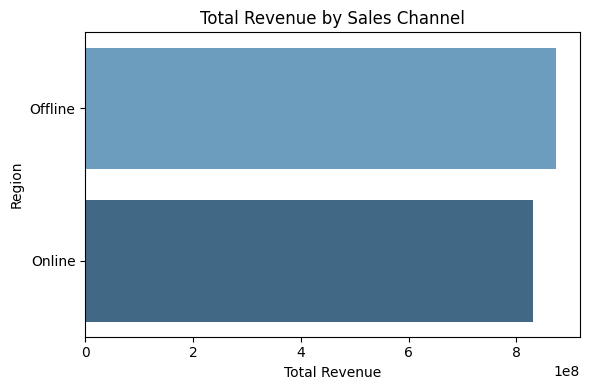

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=sales_by_sales_channel.values, y=sales_by_sales_channel.index, palette="Blues_d")
plt.title("Total Revenue by Sales Channel")
plt.xlabel("Total Revenue")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

Аналізуючи отриманий дохід у розрізі каналів продажу, бачимо, що продажі здійснюються як online так і offline, майже в рівній кількості.

# **Аналіз прибутку за категоріями, країнами та каналами продажу.**

In [ ]:
data_all["Costs"] = data_all["Units Sold"] * data_all["Unit Cost"]

In [ ]:
data_all["Profit"] = data_all["Revenue"] - data_all["Costs"]

In [ ]:
profit_by_categories = (data_all.groupby("Category")["Profit"].sum().sort_values(ascending=False))
print(profit_by_categories)

Category
Cosmetics          9.272331e+07
Office Supplies    7.797718e+07
Household          7.296247e+07
Baby Food          5.394100e+07
Clothes            4.343131e+07
Cereal             4.125503e+07
Vegetables         3.677600e+07
Meat               3.061353e+07
Snacks             2.702742e+07
Personal Care      1.409800e+07
Beverages          9.601663e+06
Fruits             1.425930e+06
Name: Profit, dtype: float64


<ipython-input-53-c76bb2ec0ffc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_by_categories.values, y=profit_by_categories.index, palette="Blues_d")


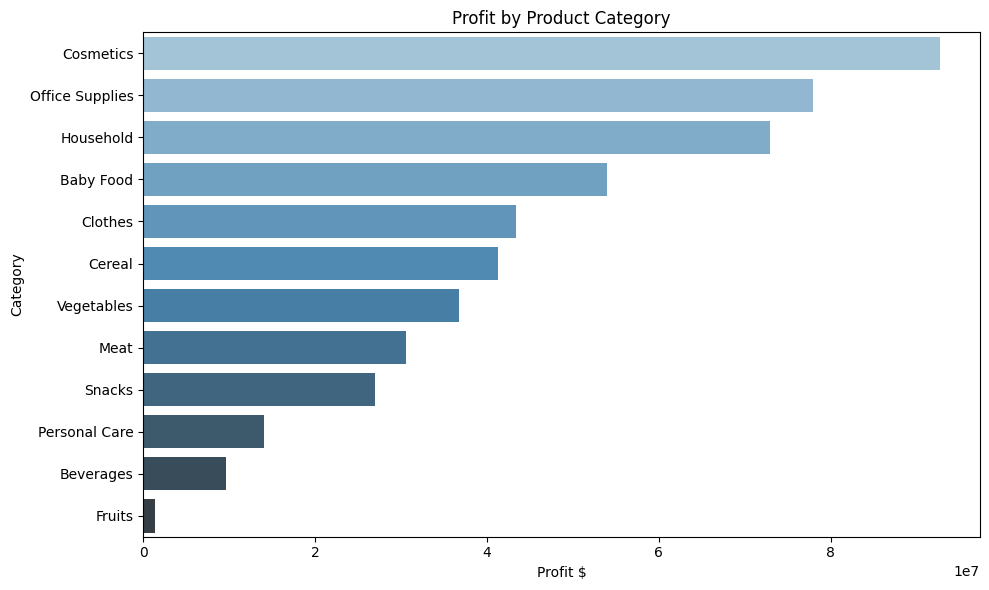

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=profit_by_categories.values, y=profit_by_categories.index, palette="Blues_d")
plt.title("Profit by Product Category")
plt.xlabel("Profit $")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

За рівнем прибутковості лідируючими категоріями є: Cosmetics, Office Supplies та Household.

In [ ]:
profit_by_countries = (data_all.groupby("Country")["Profit"].sum().sort_values(ascending=False))

<ipython-input-55-aa53630525d2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette="viridis")


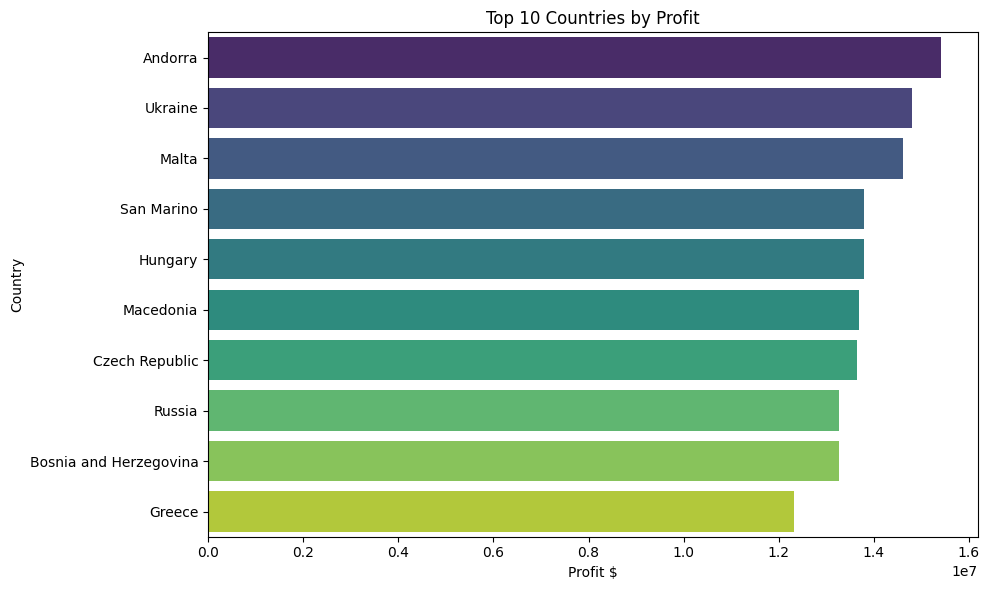

In [ ]:
top_10_countries = profit_by_countries.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette="viridis")

plt.title("Top 10 Countries by Profit")
plt.xlabel("Profit $")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

Топ 3 країни за рівнем прибутковості: Андора, Україна та Мальта.

<ipython-input-56-8d5407035f9b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_by_sales_channel.values, y=profit_by_sales_channel.index, palette="Blues_d")


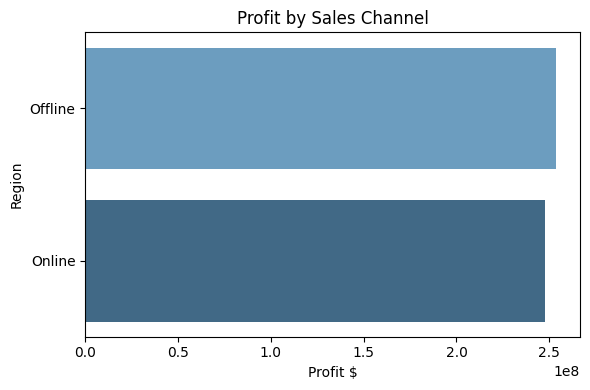

In [ ]:
profit_by_sales_channel = (data_all.groupby("Sales Channel")["Profit"].sum().sort_values(ascending=False))
plt.figure(figsize=(6, 4))
sns.barplot(x=profit_by_sales_channel.values, y=profit_by_sales_channel.index, palette="Blues_d")
plt.title("Profit by Sales Channel")
plt.xlabel("Profit $")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

Аналізуючи отриманий прибуток у розрізі каналів продажу, бачимо, що прибуток, отриманий через online продажі і offline продажі, майже однаковий.

**Аналіз інтервалу часу між замовленням та його відвантаженням **

In [ ]:
data_all["Delivery Time (days)"] = (data_all["Ship Date"] - data_all["Order Date"]).dt.days


<ipython-input-58-7b7cb1bed883>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Category", y="Delivery Time (days)", data=data_all, palette="Set2")


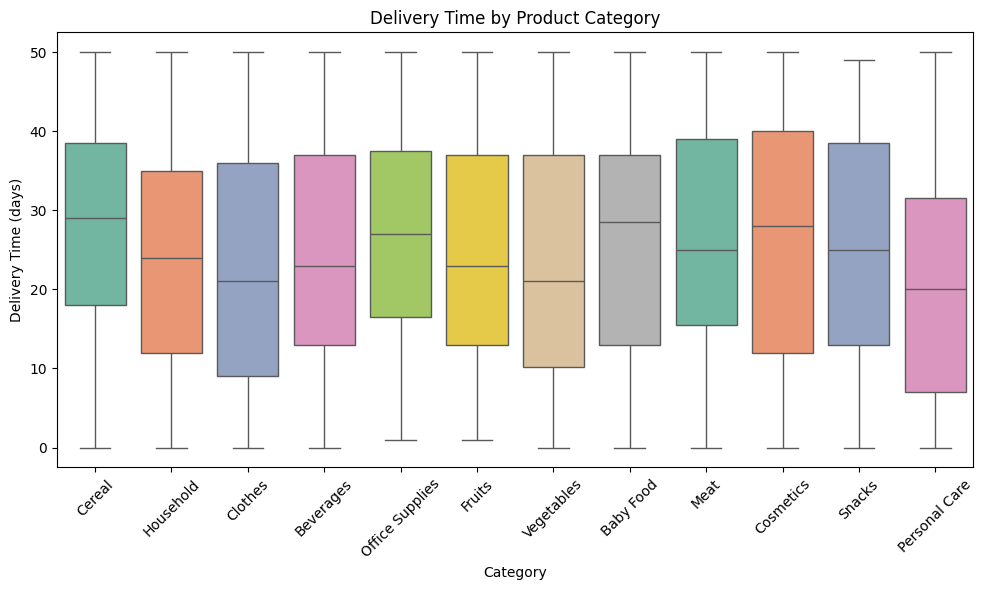

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Category", y="Delivery Time (days)", data=data_all, palette="Set2")
plt.title("Delivery Time by Product Category")
plt.xlabel("Category")
plt.ylabel("Delivery Time (days)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-59-80a63ddec679>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Country", y="Delivery Time (days)", data=filtered_data, palette="Paired")


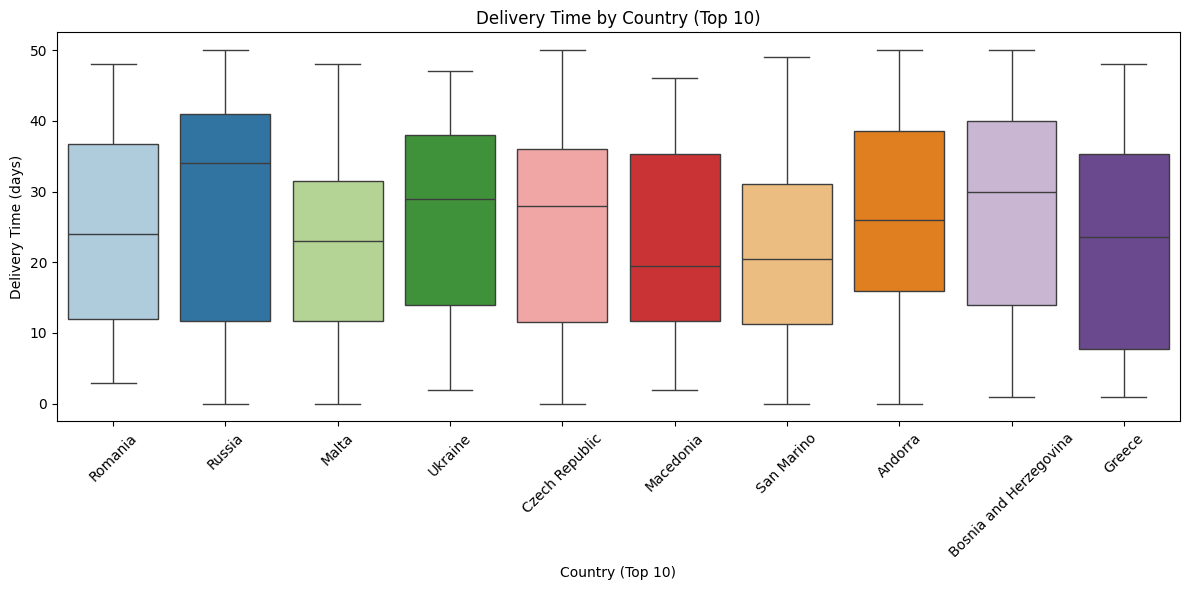

In [ ]:
top_countries = data_all["Country"].value_counts().head(10).index
filtered_data = data_all[data_all["Country"].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.boxplot(x="Country", y="Delivery Time (days)", data=filtered_data, palette="Paired")
plt.title("Delivery Time by Country (Top 10)")
plt.xlabel("Country (Top 10)")
plt.ylabel("Delivery Time (days)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-60-a154fa3a494b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="region", y="Delivery Time (days)", data=data_all, palette="coolwarm")


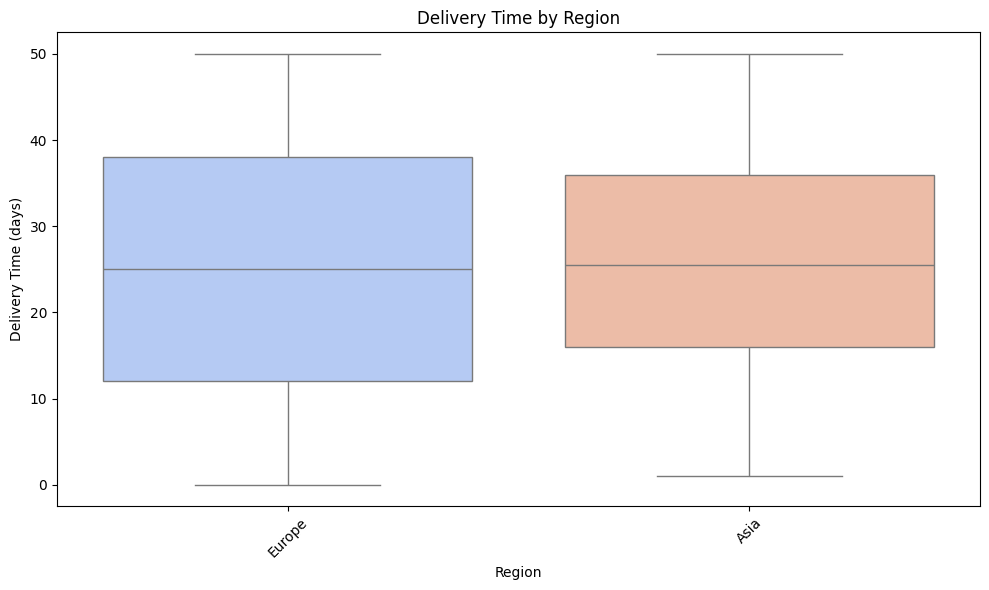

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="region", y="Delivery Time (days)", data=data_all, palette="coolwarm")
plt.title("Delivery Time by Region")
plt.xlabel("Region")
plt.ylabel("Delivery Time (days)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
mean_delivery_by_category = data_all.groupby("Category")["Delivery Time (days)"].mean().sort_values()
print(mean_delivery_by_category)

Category
Personal Care      20.721739
Clothes            23.104762
Vegetables         23.491228
Household          23.938144
Beverages          24.123967
Fruits             24.419643
Snacks             25.543689
Meat               25.846847
Cosmetics          25.912281
Baby Food          26.339286
Office Supplies    26.707317
Cereal             27.184466
Name: Delivery Time (days), dtype: float64


<ipython-input-62-df2b0114855c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_delivery_by_category.index, y=mean_delivery_by_category.values, palette="Blues_d")


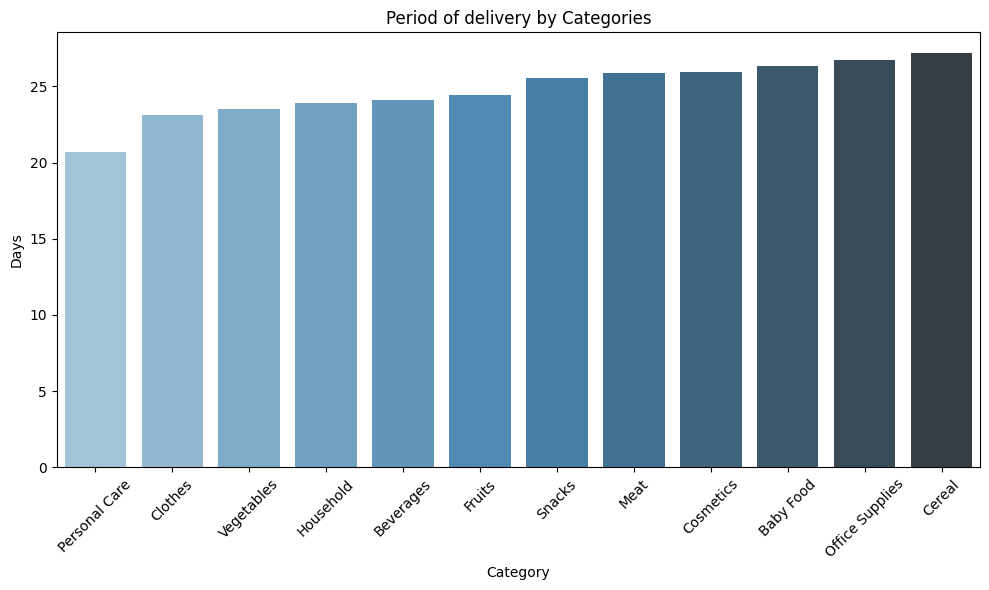

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(x=mean_delivery_by_category.index, y=mean_delivery_by_category.values, palette="Blues_d")
plt.title("Period of delivery by Categories")
plt.xlabel("Category")
plt.ylabel("Days")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Середній термін доставки по категоріях складає від 20 до 27 днів. І бачимо, що немає прямої залежності між прибутковістю і середнім терміном доставки, адже Cosmetics і Office Supplies є найприбутковішими категоріями, але середній термін доставки у них один з найвищих.

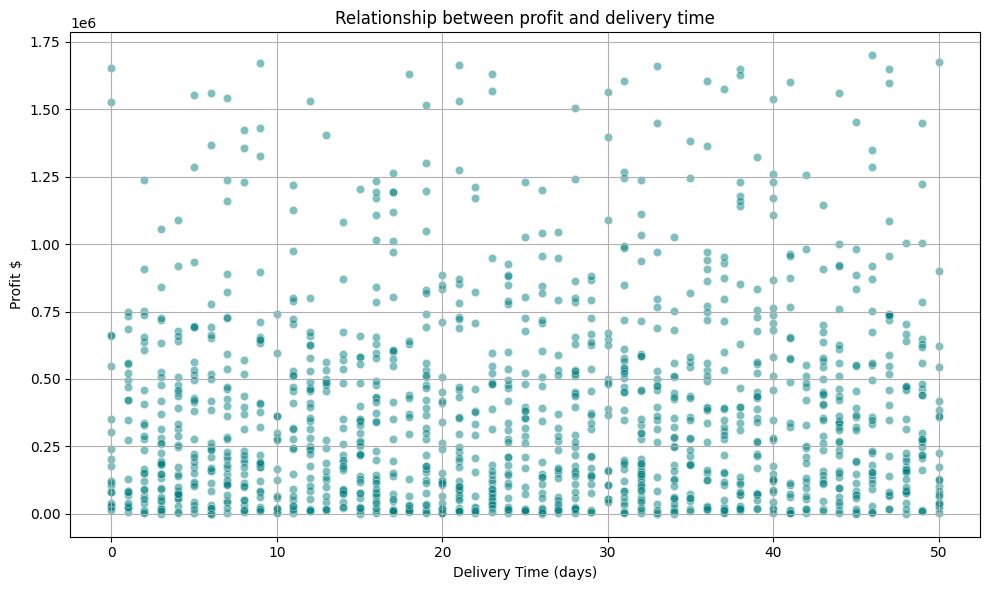

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Delivery Time (days)", y="Profit", data=data_all, alpha=0.5, color='teal')
plt.title("Relationship between profit and delivery time")
plt.xlabel("Delivery Time (days)")
plt.ylabel("Profit $")
plt.grid(True)
plt.tight_layout()
plt.show()

З графіку ми можемо побачити, що не існує прямої залежності між терміном доставки та розміром отриманого прибутку.

In [ ]:
correlation = data_all[["Delivery Time (days)", "Profit"]].corr().iloc[0, 1]
print(f"Коефіцієнт кореляції між часом доставки та прибутком: {correlation:.2f}")

Коефіцієнт кореляції між часом доставки та прибутком: 0.06


Коефіцієнт кореляції 0.06 є підтвердженням тому, що зв’язку між терміном доставки та розміром отриманого прибутку майже немає.

**Аналіз динаміки продажів у часі (по місяцях)**

In [ ]:
data_all["Order Month"] = data_all["Order Date"].dt.to_period("M").dt.to_timestamp()


In [ ]:
top_categories = ["Office Supplies", "Household", "Cosmetics"]

filtered_data = data_all[data_all["Category"].isin(top_categories)]


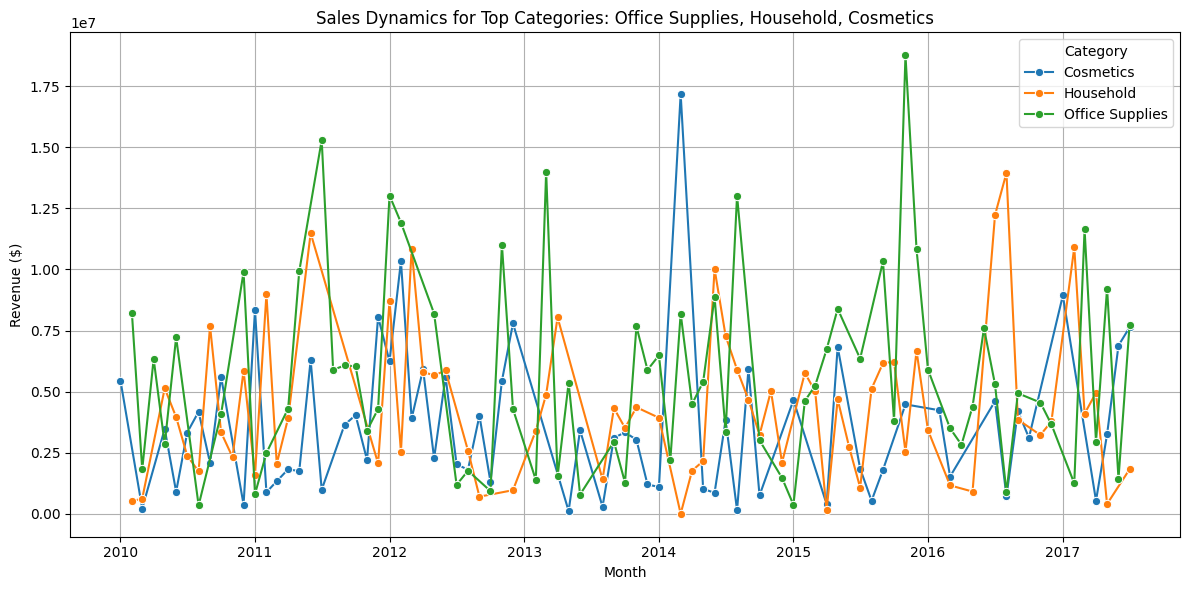

In [ ]:
sales_top_categories = (filtered_data.groupby(["Order Month", "Category"])["Revenue"].sum().reset_index())
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_top_categories, x="Order Month", y="Revenue", hue="Category", marker="o")
plt.title("Sales Dynamics for Top Categories: Office Supplies, Household, Cosmetics")
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

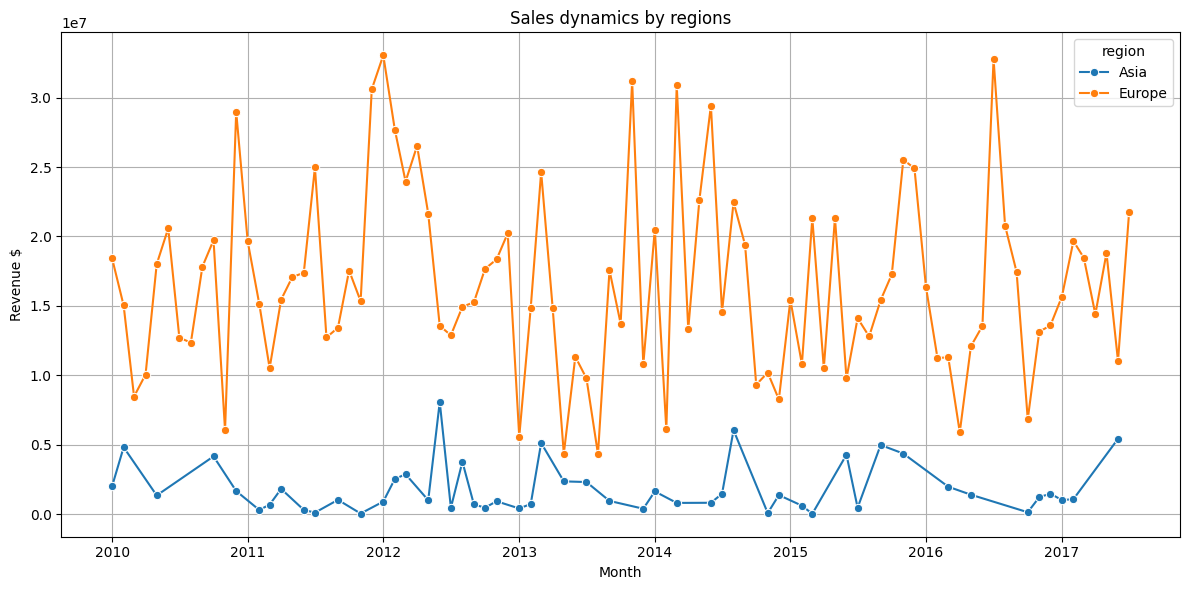

In [ ]:
sales_by_region = data_all.groupby(["Order Month", "region"])["Revenue"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_region, x="Order Month", y="Revenue", hue="region", marker="o")
plt.title("Sales dynamics by regions")
plt.xlabel("Month")
plt.ylabel("Revenue $")
plt.grid(True)
plt.tight_layout()
plt.show()

Аналізуючи графіки динаміки продажів по топовим категоріям та регіонам, можна зробити висновок, що продажам все ж притаманна сезонність, адже графіки дуже динамічні і мають явні піки. переважно це початок або кінець року. але також є піки, які можуть свідчити про певні розпродажі або акційні пропозиції.

In [ ]:
data_all["Weekday"] = data_all["Order Date"].dt.day_name()

In [ ]:
sales_by_weekday = data_all.groupby("Weekday")["Revenue"].sum().reset_index()

In [ ]:
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sales_by_weekday["Weekday"] = pd.Categorical(sales_by_weekday["Weekday"], categories=weekday_order, ordered=True)
sales_by_weekday = sales_by_weekday.sort_values("Weekday")


<ipython-input-74-a92f1e195dec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_weekday, x="Weekday", y="Revenue", palette="coolwarm")


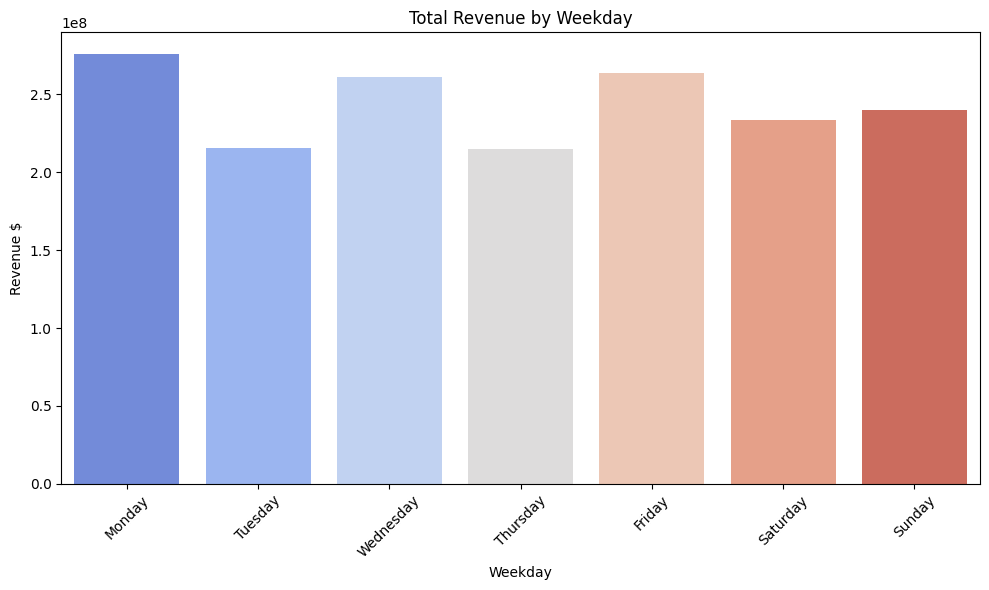

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_weekday, x="Weekday", y="Revenue", palette="coolwarm")
plt.title("Total Revenue by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Revenue $")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Найприбутковішими днями тижня виявилися: понеділок, середа та п'ятниця.

Висновки

Аналізуючи діяльність даної компанії, можна зробити наступні висновки.
Компанія динамічно розвивається підвищуючи з кожним роком рівень свого доходу.

Загальна кількість охоплених країн складає 46 (що на мій погляд є хорошим показником), це країни переважно Європи. На перспективу компанія може також розвивати свою діяльність в країнах Азії, адже наразі їх частка складає тільки 6% від всіх охоплених країн.

Компанія має широкий асортимент продукції (12 категорій товарів), які наразі є всі прибутковими і це дуже хороший показник. Але на мій погляд компанії потрібно звернути увагу на такі категорії як Beverages та Fruits, вони мають великі обєми продажу, але низьку прибутковість. Можливо потрібно покращити їх рентабельність або ж закрити і розвивати категорії, які є більш прибутковими.
